In [722]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [723]:
eda=pd.read_csv('TITANIC.csv')

In [724]:
eda

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [725]:
del eda['PassengerId'] #not used in predict the survived 
del eda['Ticket']

# variable identification

In [726]:
 eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [727]:
eda.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. 38.3 % survived
2. more people in class 3
3. 50 % are in age between 20 - 38

# step 2  Univariate Analysis

1. Categorical Variables --- Embarked , Sex , Pclass, Survived
2. Continous Variables ----- Age, Fare

### Categorical Variables

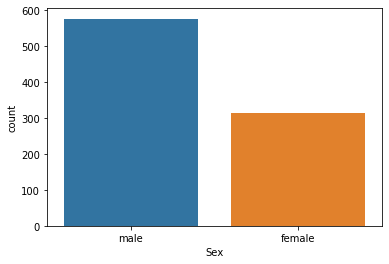

In [728]:
sns.countplot(x='Sex',data=eda)  #more number of males

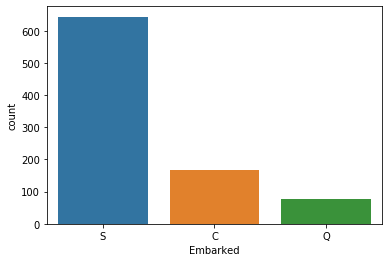

In [729]:
sns.countplot(x='Embarked',data=eda)  #more members from southampthon port

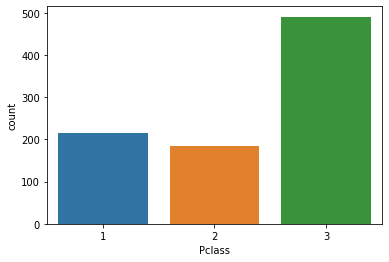

In [730]:
sns.countplot(x='Pclass',data=eda) #more number of people in 3rd class

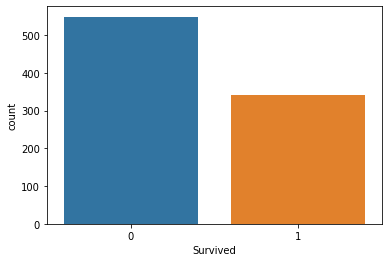

In [731]:
sns.countplot(x='Survived',data=eda)  #less number of people survived

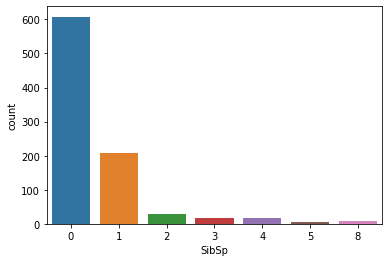

In [732]:
sns.countplot(x='SibSp',data=eda)  #Most passengers did not travel with siblings or parents.

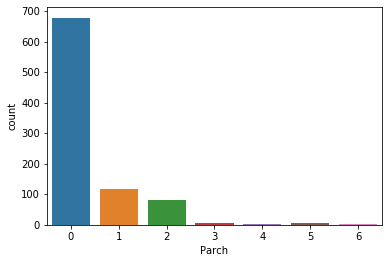

In [733]:
sns.countplot(x='Parch',data=eda)  #Most passengers did not travel with parents or children.

### Continous Variables

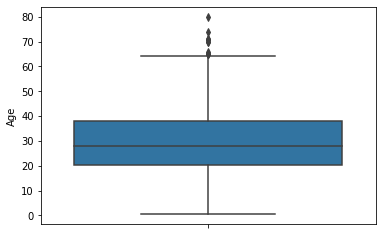

In [734]:
sns.boxplot(y='Age',data=eda)

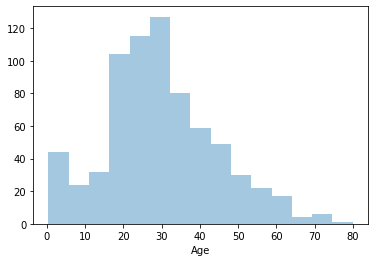

In [735]:
sns.distplot(eda['Age'].dropna(), bins=15, kde=False)

# Bivariate Analysis

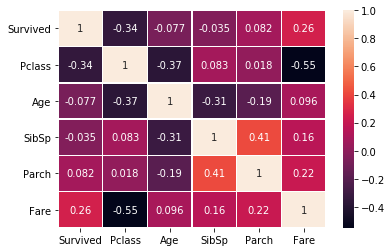

In [736]:
sns.heatmap(eda.corr(), annot=True, linewidth=0.5)  #correlation with survived column

### Categorical and Categorical

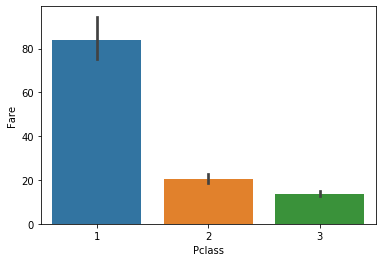

In [737]:
sns.barplot(y='Fare',x='Pclass',data=eda)

#### Fare is more for First Class

In [738]:
counts=eda.groupby(['Sex','Survived'],axis=0)
counts.size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

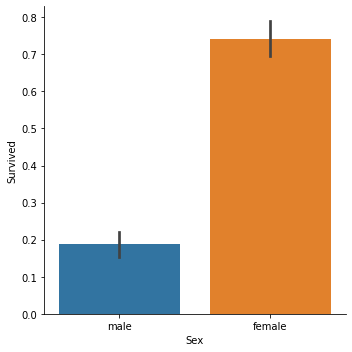

In [739]:
sns.catplot(x="Sex", y="Survived", kind="bar", data=eda)  

### More females are survived

In [740]:
counts=eda.groupby(['Pclass','Survived'],axis=0)
counts.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

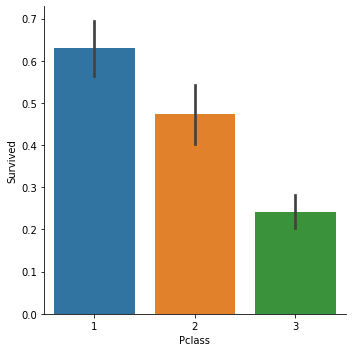

In [741]:
sns.catplot(x="Pclass", y="Survived", kind="bar", data=eda)  

####  More First Class people Survived

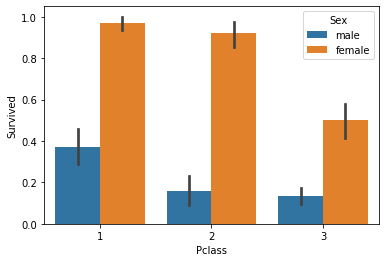

In [742]:
sns.barplot('Pclass','Survived',hue='Sex', data=eda)  #males and females survival rate in the three classes

#### Women Survival Rate is more in each Pclass

In [743]:
counts=eda.groupby(['Embarked','Survived'],axis=0)
counts.size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

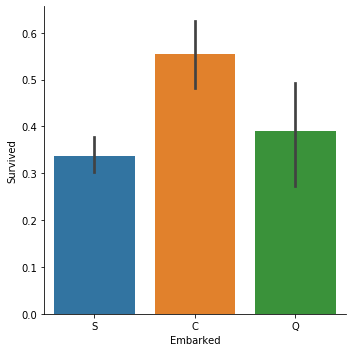

In [744]:
sns.catplot(x="Embarked", y="Survived", kind="bar", data=eda)  #more survived from Cherbourg

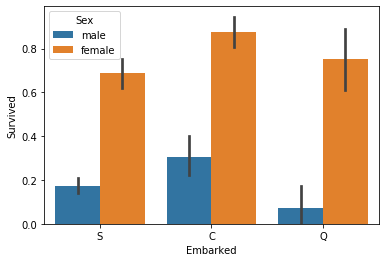

In [745]:
sns.barplot('Embarked','Survived',hue='Sex', data=eda)  #male and female survival rate in each embarked port

#### Women Survival Rate is more in each embarked port and the whole survival rate is more in cherbourg

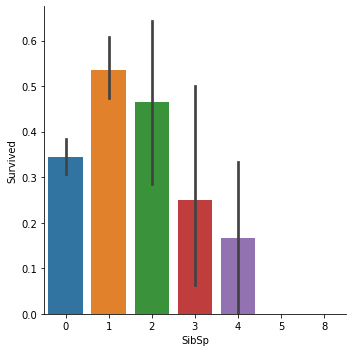

In [746]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=eda) 

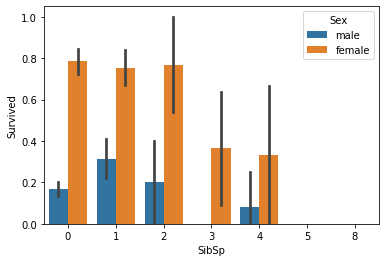

In [747]:
sns.barplot('SibSp','Survived',hue='Sex', data=eda)

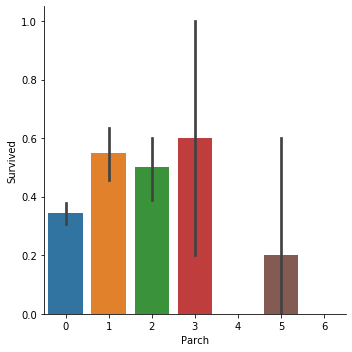

In [748]:
sns.catplot(x="Parch", y="Survived", kind="bar", data=eda) 

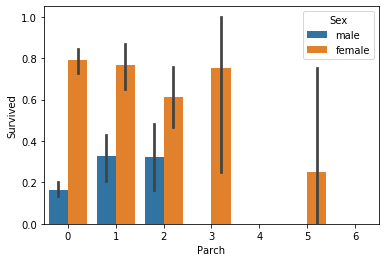

In [749]:
sns.barplot('Parch','Survived',hue='Sex', data=eda)

###  Null Value Treatment

In [750]:
eda.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False


In [751]:
eda.isnull().values.any()

True

In [752]:
eda.isnull().sum()  #age,cabin and embarked has null values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [753]:
del eda['Cabin']  #more null numbers 
del eda['Name']
eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [754]:
eda['Embarked'].mode()  #most often occured in Embarked

0    S
dtype: object

In [755]:
eda['Embarked']= eda['Embarked'].fillna(value='S') #replacing with mode
eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [756]:
eda['Embarked'].isnull().sum()  #replaced with mode

0

In [757]:
eda['Age']= eda['Age'].fillna(value= eda['Age'].median() ) #replacing with median
eda

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [758]:
age_by_pclass_sex = eda.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(eda['Age'].median()))


Median age of Pclass 1 females: 32.5
Median age of Pclass 1 males: 36.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.0
Median age of Pclass 3 females: 28.0
Median age of Pclass 3 males: 28.0
Median age of all passengers: 28.0


In [759]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
eda['Age'] = eda.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
eda


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [760]:
eda.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Engineering

In [761]:
a=[]
for i in eda['Age']:
    if(0<i<10):
        i='Child'
    elif(11<i<18):
        i='Teen'
    else:
        i='Adult'
    a.append(i)
print(a)
eda['children']=pd.Series(a)
print(type(eda['children']))

['Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Child', 'Adult', 'Teen', 'Child', 'Adult', 'Adult', 'Adult', 'Teen', 'Adult', 'Child', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Teen', 'Adult', 'Child', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Teen', 'Adult', 'Adult', 'Adult', 'Child', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Child', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Child', 'Adult', 'Adult', 'Adult', 'Adult', 'Child', 'Adult', 'Adult', 'Adult', 'Adult', 'Teen', 'Adult', 'Adult', 'Teen', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Child', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Teen', 'Adult', 'Teen', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Teen', 

In [762]:
eda1=pd.concat([eda,eda['children']],axis=1)
eda1= eda1.T.drop_duplicates().T #dropping duplicate columns
eda1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,children
0,0,3,male,22,1,0,7.25,S,Adult
1,1,1,female,38,1,0,71.2833,C,Adult
2,1,3,female,26,0,0,7.925,S,Adult
3,1,1,female,35,1,0,53.1,S,Adult
4,0,3,male,35,0,0,8.05,S,Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13,S,Adult
887,1,1,female,19,0,0,30,S,Adult
888,0,3,female,28,1,2,23.45,S,Adult
889,1,1,male,26,0,0,30,C,Adult


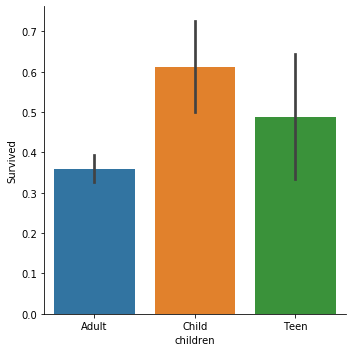

In [763]:
sns.catplot(x="children", y="Survived", kind="bar", data=eda)  

### This graph shows that more children were survived

# Drawn Insights

1. More women were survived when compared to men in all Pclasses, withrespect to embarked ports
2. Children were survived compared to the other age groups.
3. Upper Class were more survived when compared to other classes.